## Load and Cleaning

In [1]:
#important liberaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [3]:
#load data set
df=pd.read_excel('C:/Users/SIMEGNISH/Documents/GitHub/Loan_prediction_Hackathon/loan.xlsx')

In [4]:
df.head()

,Loan_ID,Gender,Married,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status
0,LP001002,Male,No,No,5849,0.0,NaN,360.0,Y
1,LP001003,Male,Yes,No,4583,1508.0,128.0,360.0,N
2,LP001005,Male,Yes,Yes,3000,0.0,66.0,360.0,Y
3,LP001006,Male,Yes,No,2583,2358.0,120.0,360.0,Y
4,LP001008,Male,No,No,6000,0.0,141.0,360.0,Y


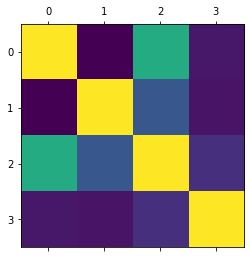

In [5]:
plt.matshow(df.corr())
plt.show()

In [6]:
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878
LoanAmount,0.570909,0.188619,1.000000,0.039447
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000


In [65]:
df.shape

(614, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Self_Employed      582 non-null    object 
 4   ApplicantIncome    614 non-null    int64  
 5   CoapplicantIncome  614 non-null    float64
 6   LoanAmount         592 non-null    float64
 7   Loan_Amount_Term   600 non-null    float64
 8   Loan_Status        614 non-null    object 
dtypes: float64(3), int64(1), object(5)
memory usage: 43.3+ KB


In [7]:
#missing value proportion
null_val_sums = df.isnull().sum()
pd.DataFrame({"Column": null_val_sums.index, "Number of Null Values": null_val_sums.values,
"Proportion": null_val_sums.values / len(df) })

,Column,Number of Null Values,Proportion
0,Loan_ID,0,0.000000
1,Gender,13,0.021173
2,Married,3,0.004886
3,Self_Employed,32,0.052117
4,ApplicantIncome,0,0.000000
5,CoapplicantIncome,0,0.000000
6,LoanAmount,22,0.035831
7,Loan_Amount_Term,14,0.022801
8,Loan_Status,0,0.000000


# Categorical Columns

In [8]:
#lists the columns with categorical data
object_train_df=df.select_dtypes(include=['object'])    
object_train_df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Self_Employed', 'Loan_Status'], dtype='object')

# Numerical Columns

In [9]:
#lists the columns with numerical data
num_train_df=df.select_dtypes(include=['int','float'])     
num_train_df.columns


Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term'],
      dtype='object')

# Dropping Loan Status Null Values and Labeling it

In [10]:
#drop loan status if it has null value
df.dropna(subset=['Loan_Status'], inplace=True)
#encoding
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
df['Loan_Status'] = le.fit_transform(df['Loan_Status'])
df
#it lables yes as 1 and no as 0

,Loan_ID,Gender,Married,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status
0,LP001002,Male,No,No,5849,0.0,NaN,360.0,1
1,LP001003,Male,Yes,No,4583,1508.0,128.0,360.0,0
2,LP001005,Male,Yes,Yes,3000,0.0,66.0,360.0,1
3,LP001006,Male,Yes,No,2583,2358.0,120.0,360.0,1
4,LP001008,Male,No,No,6000,0.0,141.0,360.0,1
...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,No,2900,0.0,71.0,360.0,1
610,LP002979,Male,Yes,No,4106,0.0,40.0,180.0,1
611,LP002983,Male,Yes,No,8072,240.0,253.0,360.0,1
612,LP002984,Male,Yes,No,7583,0.0,187.0,360.0,1


In [11]:
df['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

C:\Users\Smegn\anaconda3\anconda2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


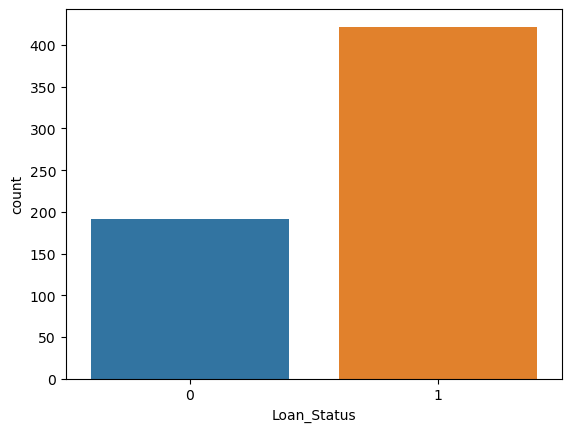

In [67]:
sns.countplot(df['Loan_Status'])
plt.show()

In [11]:
df.groupby(['Gender'])['Loan_Status'].value_counts()

Gender  Loan_Status
Female  1               75
        0               37
Male    1              339
        0              150
Name: Loan_Status, dtype: int64

In [12]:
df.groupby(['Married'])['Loan_Status'].value_counts()

Married  Loan_Status
No       1              134
         0               79
Yes      1              285
         0              113
Name: Loan_Status, dtype: int64

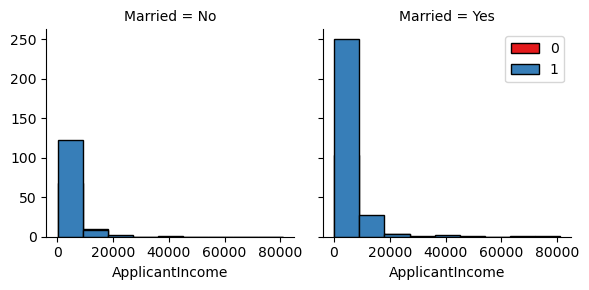

In [17]:
bins = np.linspace(df.ApplicantIncome.min(),df.ApplicantIncome.max(), 10)
g = sns.FacetGrid(df, col='Married', hue='Loan_Status', palette="Set1", col_wrap=2)
g.map(plt.hist,'ApplicantIncome', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

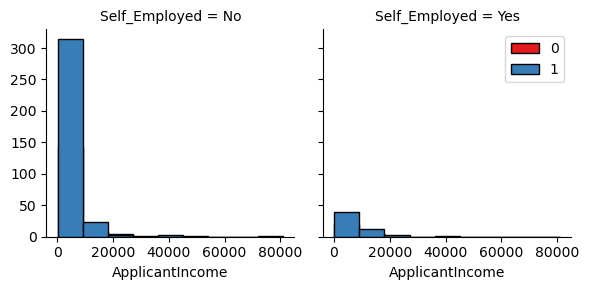

In [18]:
bins = np.linspace(df.ApplicantIncome.min(),df.ApplicantIncome.max(), 10)
g = sns.FacetGrid(df, col='Self_Employed', hue='Loan_Status', palette="Set1", col_wrap=2)
g.map(plt.hist,'ApplicantIncome', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

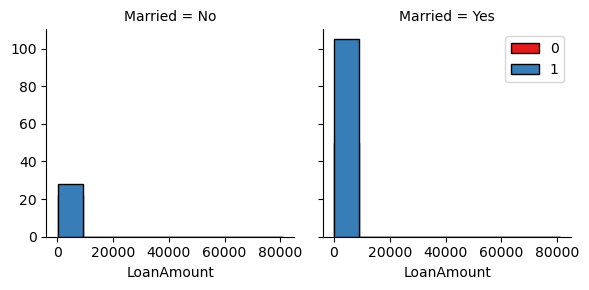

In [19]:
bins = np.linspace(df.ApplicantIncome.min(),df.ApplicantIncome.max(), 10)
g = sns.FacetGrid(df, col='Married', hue='Loan_Status', palette="Set1", col_wrap=2)
g.map(plt.hist,'LoanAmount', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

In [20]:
df['Loan_Amount_Term'].nunique()

10

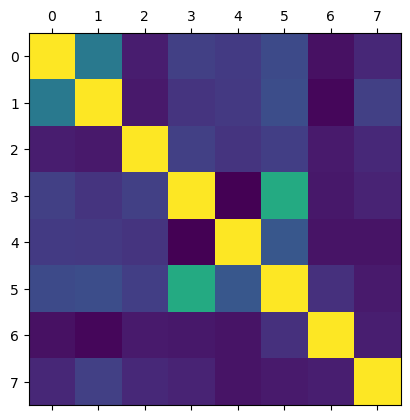

In [70]:
plt.matshow(df.corr())
plt.show()

C:\Users\Smegn\anaconda3\anconda2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


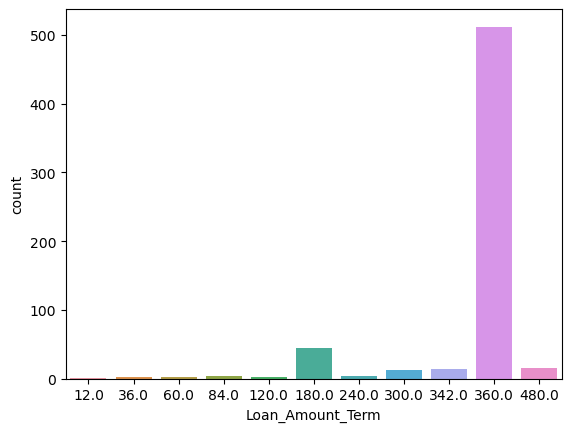

In [68]:
sns.countplot(df['Loan_Amount_Term'])
plt.show()

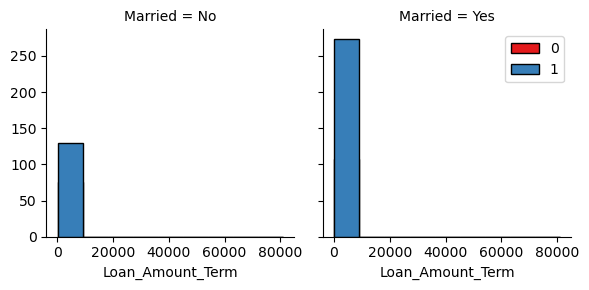

In [21]:
bins = np.linspace(df.ApplicantIncome.min(),df.ApplicantIncome.max(), 10)
g = sns.FacetGrid(df, col='Married', hue='Loan_Status', palette="Set1", col_wrap=2)
g.map(plt.hist,'Loan_Amount_Term', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

In [24]:
#encode
cat=[ 'Gender', 'Married', 'Self_Employed']
for var in cat:
    le = preprocessing.LabelEncoder()
    df[var]=le.fit_transform(df[var].astype('str'))
df.dtypes

Loan_ID               object
Gender                 int32
Married                int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Loan_Status            int64
dtype: object

# fill missing value and detect outliers

In [26]:
df.isna().sum()

Loan_ID               0
Gender                0
Married               0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Loan_Status           0
dtype: int64

In [28]:
#fill missing value
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 0 to 613
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int32  
 2   Married            614 non-null    int32  
 3   Self_Employed      614 non-null    int32  
 4   ApplicantIncome    614 non-null    int64  
 5   CoapplicantIncome  614 non-null    float64
 6   LoanAmount         614 non-null    float64
 7   Loan_Amount_Term   614 non-null    float64
 8   Loan_Status        614 non-null    int64  
dtypes: float64(3), int32(3), int64(2), object(1)
memory usage: 40.8+ KB


C:\Users\Smegn\anaconda3\anconda2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


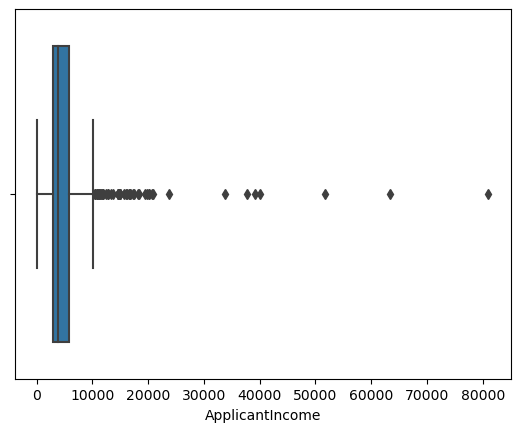

C:\Users\Smegn\anaconda3\anconda2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


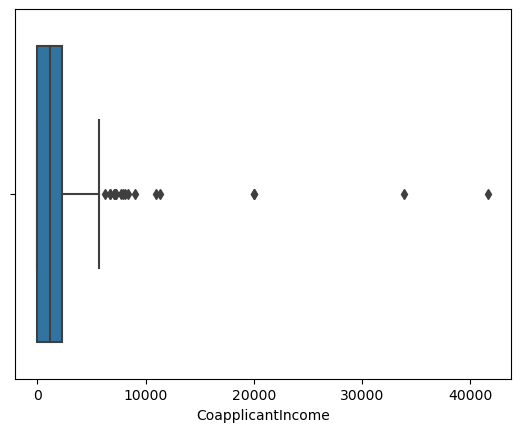

C:\Users\Smegn\anaconda3\anconda2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


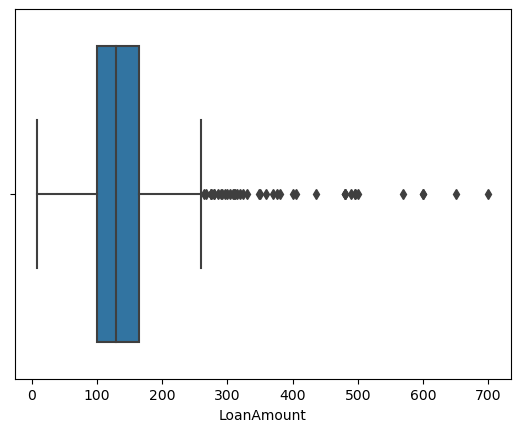

C:\Users\Smegn\anaconda3\anconda2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


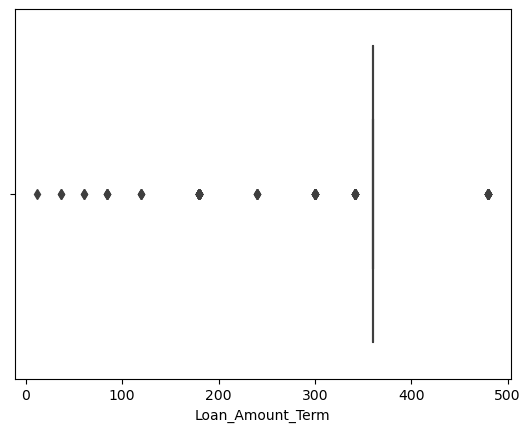

In [31]:
# Box Plot
colm=['ApplicantIncome', 'CoapplicantIncome' ,'LoanAmount', 'Loan_Amount_Term']
for col in colm:
    sns.boxplot(df[col])
    plt.show()

In [32]:
##detection
# IQR
for col in colm:
    Q1 = np.percentile(df[col], 25,interpolation = 'midpoint')
    Q3 = np.percentile(df[col], 75,interpolation = 'midpoint')
    IQR = Q3 - Q1
    print(IQR)

2911.0
2292.5
64.0
0.0


In [33]:
for col in colm:
# Upper bound
    upper = np.where(df[col] >= (Q3+1.5*IQR))
# Lower bound
    lower = np.where(df[col] <= (Q1-1.5*IQR))
# ''' Removing the Outliers '''
    df[col].drop(upper[0], inplace = True)
    df[col].drop(lower[0], inplace = True)
print(df.shape)

(614, 9)


In [35]:
#By using the counter function we are to get the count of Good, Very Good and Average.
from collections import Counter as c
print(c(df['ApplicantIncome']))  #returns the class count values 

Counter({2500: 9, 4583: 6, 6000: 6, 2600: 6, 3750: 5, 4166: 5, 3333: 5, 5000: 5, 2583: 4, 2400: 4, 6250: 4, 8333: 4, 3000: 3, 5417: 3, 2333: 3, 3167: 3, 3500: 3, 4000: 3, 10000: 3, 4333: 3, 3166: 3, 3400: 3, 3200: 2, 3510: 2, 3717: 2, 3667: 2, 1800: 2, 4300: 2, 4652: 2, 7333: 2, 14583: 2, 2014: 2, 9323: 2, 1820: 2, 6400: 2, 2383: 2, 12000: 2, 2479: 2, 3418: 2, 5703: 2, 3173: 2, 4283: 2, 5500: 2, 5746: 2, 3083: 2, 5250: 2, 2833: 2, 2917: 2, 2378: 2, 8750: 2, 2666: 2, 4750: 2, 2213: 2, 1025: 2, 3466: 2, 1958: 2, 3859: 2, 2083: 2, 2947: 2, 3159: 2, 5849: 1, 3036: 1, 4006: 1, 12841: 1, 3073: 1, 1853: 1, 1299: 1, 4950: 1, 3596: 1, 4887: 1, 7660: 1, 5955: 1, 3365: 1, 9560: 1, 2799: 1, 4226: 1, 1442: 1, 4692: 1, 12500: 1, 2275: 1, 1828: 1, 3748: 1, 3600: 1, 3941: 1, 4695: 1, 3410: 1, 5649: 1, 5821: 1, 2645: 1, 1928: 1, 3086: 1, 4230: 1, 4616: 1, 11500: 1, 2708: 1, 2132: 1, 3366: 1, 8080: 1, 3357: 1, 3029: 1, 2609: 1, 4945: 1, 5726: 1, 10750: 1, 7100: 1, 3208: 1, 1875: 1, 4755: 1, 5266: 1, 100

# Feature Selection/Extraction


In [36]:
# Dropping unwanted columns
df = df.drop(['Loan_ID'], axis=1)

In [38]:
df['Loan_Amount_Term'].unique()
df.columns


Index(['Gender', 'Married', 'Self_Employed', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Loan_Status'],
      dtype='object')

In [93]:
# total income
#df['Total_income']=df['ApplicantIncome']+df['CoapplicantIncome']

In [105]:
Feature=df[['Gender', 'Married', 'Self_Employed', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']]

In [106]:
X = Feature
X[0:5]

,Gender,Married,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,1,0,0,5849,0.0,146.412162,360.0
1,1,1,0,4583,1508.0,128.000000,360.0
2,1,1,1,3000,0.0,66.000000,360.0
3,1,1,0,2583,2358.0,120.000000,360.0
4,1,0,0,6000,0.0,141.000000,360.0


In [107]:
y = df['Loan_Status'].values
y[0:20]

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1],
      dtype=int64)

## Splitting Dataset

In [108]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=32)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (491, 7) (491,)
Test set: (123, 7) (123,)


# Logistic Regression

In [117]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [110]:
lr_pred=lr.predict(X_test)
lr_pred_prob = lr.predict_proba(X_test)
print(lr_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1]


In [111]:
import pickle

In [112]:
#save model as pkl
filename='loan'
pickle.dump(lr,open(filename,'wb'))

In [113]:
model = pickle.load(open('loan', 'rb'))
model.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [114]:
from sklearn.metrics import accuracy_score,f1_score,log_loss

In [115]:
print("LR Accuray: %.2f" % accuracy_score(y_test,lr_pred))
print("LR F1-score: %.2f" % f1_score(y_test,lr_pred,average='weighted'))
print("LR LogLoss: %.2f" % log_loss(y_test,lr_pred_prob ))

LR Accuray: 0.67
LR F1-score: 0.55
LR LogLoss: 0.66


In [119]:
X_new=X_test[1]
pred=lr.predict(X_new)
print(pred)

KeyError: 1

# Support Vector Classifier

In [47]:
from sklearn import svm
svm=svm.SVC(kernel='linear', C=0.1)
svm.fit(X_train,y_train)

SVC(C=0.1, kernel='linear')

In [48]:
svm_pred=svm.predict(X_test)
print("SVM Accuray: %.2f" % accuracy_score(y_test,svm_pred))
print("SVM F1-score: %.2f" % f1_score(y_test,svm_pred,average='weighted'))

SVM Accuray: 0.67
SVM F1-score: 0.55


# K-nearest Neighbor

In [49]:
from sklearn.neighbors import KNeighborsClassifier
score=[]
for k in range(1,10):
    knn=KNeighborsClassifier(n_neighbors=k,weights='uniform')
    knn.fit(X_train,y_train)
    predKNN=knn.predict(X_test)
    accuracy=accuracy_score(predKNN,y_test)
    score.append(accuracy*100)
    print (k,': ',accuracy)

1 :  0.6097560975609756
2 :  0.5365853658536586
3 :  0.6341463414634146
4 :  0.6260162601626016
5 :  0.6666666666666666
6 :  0.6666666666666666
7 :  0.6829268292682927
8 :  0.6910569105691057
9 :  0.6991869918699187


9  :  69.92 %


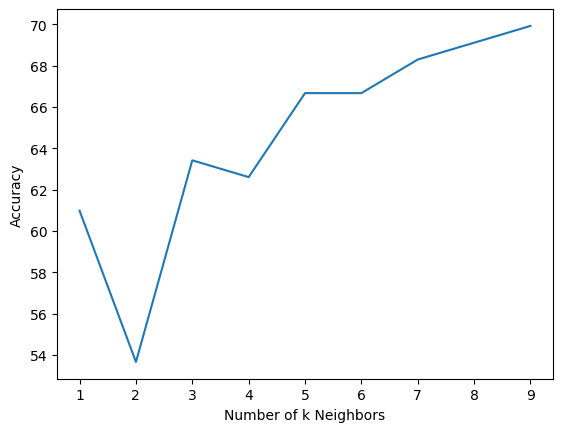

In [50]:
print(score.index(max(score))+1,' : ',round(max(score),2),'%')
plt.plot(range(1,10),score)
plt.xlabel('Number of k Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [51]:
knn=KNeighborsClassifier(n_neighbors=1,weights='uniform')
knn.fit(X_train,y_train)
knn_pred=knn.predict(X_test)
print("KNN Accuray: %.2f" % accuracy_score(y_test,knn_pred))
print("KNN F1-score: %.2f" % f1_score(y_test,knn_pred,average='weighted'))

KNN Accuray: 0.61
KNN F1-score: 0.60


# Decision Tree

In [56]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='gini',max_depth=20,max_features=7)
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=20, max_features=7)

In [57]:
dt_pred=dt.predict(X_test)

In [58]:
print("DT Accuray: %.2f" % accuracy_score(y_test,dt_pred))
print("DT F1-score: %.2f" % f1_score(y_test,dt_pred,average='weighted'))

DT Accuray: 0.58
DT F1-score: 0.57


# Random Forest

In [59]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=10,criterion='gini',max_depth=20,max_features=7)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, max_features=7, n_estimators=10)

In [60]:
rf_pred=rf.predict(X_test)

In [61]:
print("RF Accuray: %.2f" % accuracy_score(y_test,rf_pred))
print("RF F1-score: %.2f" % f1_score(y_test,rf_pred,average='weighted'))

RF Accuray: 0.63
RF F1-score: 0.60


# XGB Classifier

In [62]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(X_train, y_train)

[12:34:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Smegn\anaconda3\anconda2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [63]:
xgb_pred = xgb.predict(X_test)

In [64]:
print("XGB Accuray: %.2f" % accuracy_score(y_test,xgb_pred))
print("XGB F1-score: %.2f" % f1_score(y_test,xgb_pred,average='weighted'))

XGB Accuray: 0.64
XGB F1-score: 0.60
